In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

In [15]:

companies = ['Microsoft', 'Apple', 'Amazon', 'Alphabet', 'Facebook', 'Visa', 'JP', 'JNJ', 'Walmart', 'Mastercard']
market_cap = [1567, 1909, 1578, 1025, 754, 428, 321, 388, 370, 332]
microsoft_data = pd.read_csv('MSFT (1).csv', parse_dates = ['Date'], index_col = ['Date'])

apple_data = pd.read_csv('AAPL (1).csv', parse_dates = ['Date'], index_col = ['Date'])

amazon_data = pd.read_csv('AMZN (1).csv', parse_dates = ['Date'], index_col = ['Date'])

alphabet_data = pd.read_csv('GOOGL (1).csv', parse_dates = ['Date'], index_col = ['Date'])

facebook_data = pd.read_csv('FB (2).csv', parse_dates = ['Date'], index_col = ['Date'])

visa_data = pd.read_csv('V (1).csv', parse_dates = ['Date'], index_col = ['Date'])

jp_data = pd.read_csv('JPM (1).csv', parse_dates = ['Date'], index_col = ['Date'])

jnj_data = pd.read_csv('JNJ (1).csv', parse_dates = ['Date'], index_col = ['Date'])

walmart_data = pd.read_csv('WMT (1).csv', parse_dates = ['Date'], index_col = ['Date'])

mastercard_data = pd.read_csv('MA (1).csv', parse_dates = ['Date'], index_col = ['Date'])

benchmark_data = pd.read_csv('^GSPC (1).csv', parse_dates = ['Date'], index_col = ['Date'])
data_together = pd.concat([microsoft_data[['Adj Close']],apple_data[['Adj Close']], amazon_data[['Adj Close']], alphabet_data[['Adj Close']], facebook_data[['Adj Close']], visa_data[['Adj Close']], jp_data[['Adj Close']], jnj_data[['Adj Close']], walmart_data[['Adj Close']], mastercard_data[['Adj Close']]], axis = 1)

data_together.columns = [ 'Microsoft', 'Apple','Amazon', 'Alphabet', 'Facebook', 'Visa', 'JP', 'JNJ', 'Walmart', 'Mastercard']
all_columns = ['microsoft', 'apple', 'amazon', 'alphabet', 'facebook', 'visa', 'jp morgan', 'johnson and johnson', 'walmart', 'mastercard']

In [16]:
print('Here are the list of stocks that you can analyze: Microsoft, Apple, Amazon, Alphabet, Facebook, Visa, JP Morgan, Johnson and Johnson, Walmart, Mastercard')
stocks = input('What stocks would you like to analyze: ').lower().split(',')
stripped_stocks = [stock.strip() for stock in stocks]
counter = 0
while True:
    check = all(item in all_columns for item in stripped_stocks)
    if check == True:
        break
    else:
        print('You spelled something wrong, please re-enter your stocks')
        stocks = input('What stocks would you like to analyze: ').lower().split(',')
        stripped_stocks = [stock.strip() for stock in stocks]


Here are the list of stocks that you can analyze: Microsoft, Apple, Amazon, Alphabet, Facebook, Visa, JP Morgan, Johnson and Johnson, Walmart, Mastercard
What stocks would you like to analyze: Microsoft, Apple


In [17]:
name_matches= {'microsoft':'Microsoft',
         'apple':'Apple',
         'facebook':'Facebook',
         'jp morgan':"JP",
         'johnson and johnson':'JNJ',
         'walmart':'Walmart',
         'mastercard':'Mastercard',
         'alphabet':'Alphabet',
         'amazon':'Amazon',
         'visa':'Visa'}
number_matches = {'microsoft': 1567,
         'apple': 1909,
         'facebook': 754,
         'jp morgan': 321,
         'johnson and johnson': 388,
         'walmart': 370,
         'mastercard': 332,
         'alphabet': 1025,
         'amazon': 1578,
         'visa': 428}

for column in all_columns:
    if column not in stripped_stocks:
        data_together.drop(name_matches[column], axis = 1, inplace = True)
        companies.remove(name_matches[column])
        market_cap.remove(number_matches[column])

Before we start I want you to take a guess on which stock you think will perform best based on market cap


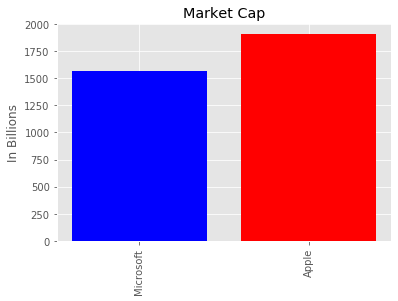

Your guess: Apple


In [18]:
print('Before we start I want you to take a guess on which stock you think will perform best based on market cap')
plt.bar(companies, market_cap, color=['blue', 'red', 'green', 'black', 'cyan'])
plt.title('Market Cap')
plt.ylabel('In Billions')
plt.xticks(rotation = 90)
plt.show()
guess = input('Your guess: ')

In [20]:
fig = px.line(data_together, x=data_together.index, y = data_together.columns)
fig.update_layout(
    title={
        'text': "Stock Prices in Dollars"})
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    ),
    showspikes = True
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(legend_title_text='Companies')
fig.show()
print('Stock prices for the companies you inputted on a daily basis')

Stock prices for the companies you inputted on a daily basis


In [130]:
fig_1 = px.line(benchmark_data['Adj Close'], x = benchmark_data.index, y = 'Adj Close', title = 'S&P 500 Data')
fig_1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

fig_1.update_traces(hovertemplate=None)
fig_1.update_layout(hovermode="x")
fig_1.show()
print('This graph displays the daily S&P 500 stock index, which will be used as the benchmark to calculate the Sharpe Ratio')

This graph displays the daily S&P 500 stock index, which will be used as the benchmark to calculate the Sharpe Ratio


In [129]:
stock_returns = data_together.pct_change()
fig_2 = px.line(stock_returns, x= stock_returns.index, y = stock_returns.columns)
fig_2.update_layout(
    title={
        'text': "Percent Changes"})
fig_2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    ),
    showspikes = True
)

fig_2.update_layout(legend_title_text='Companies')
fig_2.show()
print('This graph displays the percent change for each stock on a daily basis. The percent change represents the returns for each stock')

This graph displays the percent change for each stock on a daily basis


In [131]:
sp_returns = benchmark_data['Adj Close'].pct_change()
fig_3 = px.line(sp_returns, x= benchmark_data.index, y = ['Adj Close'])
fig_3.update_layout(
    title={
        'text': "Percent Changes"})
fig_3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

fig_3.show()
print('This graph displays the daily percent change for the S&P 500 index. The percent change represents the return for the S&P 500.')

This graph displays the daily percent change for the S&P 500 index


In [132]:
excess_returns = stock_returns.sub(sp_returns, axis = 0)
fig_4 = px.line(excess_returns, x= excess_returns.index, y = excess_returns.columns)
fig_4.update_layout(
    title={
        'text': "Excess Returns"})
fig_4.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

fig_4.show()
print('This displays the excess returns between the stocks you selected and the S&P 500. This was calculate by simply subtracting the S&P 500 retuns from the stock returns')

This displays the excess returns between the stocks you selected and the S&P 500. This was calculate by simply subtracting the S&P 500 retuns from the stock returns


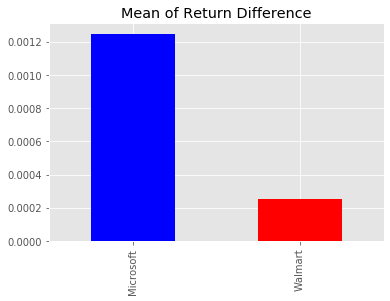

This is the mean of the excess returns


In [133]:
avg_excess_returns = excess_returns.mean()
avg_excess_returns.plot.bar(title = 'Mean of Return Difference', color=['blue', 'red', 'green', 'black', 'cyan'])
plt.show()
print('This is the mean of the excess returns')

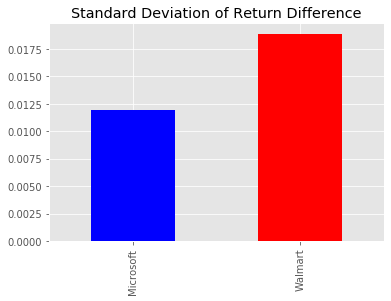

This is the standard Deviation of the excess returns 


In [134]:
sd_excess_returns = excess_returns.std()
sd_excess_returns.plot.bar(title = 'Standard Deviation of Return Difference', color=['blue', 'red', 'green', 'black', 'cyan'])
plt.show()
print('This is the standard Deviation of the excess returns ')

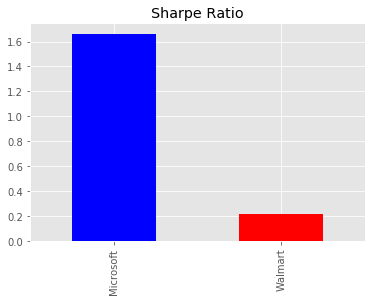

We finally have the Sharpe Ratio. The higher the value, the better the stock performed in term of it's risk. 
You guessed Microsoft


In [135]:
daily_sharpe_ratio = avg_excess_returns.div(sd_excess_returns)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title = 'Sharpe Ratio', color=['blue', 'red', 'green', 'black', 'cyan'])
plt.show()
print("We finally have the Sharpe Ratio. This was calculated by dividing the standard deviation of the excess returns by the average of the excess returns. This was then multiplied by the square root of the number of working days, 252. The higher the value, the better the stock performed in term of it's risk. ")
print(f'You guessed {guess}')